#### 一、提取公司信息

In [1]:
import pdfplumber
import os
import pandas as pd

#遍历文件夹所有的PDF文件
file_dir = r'C:\Users\Lenovo\Desktop\PDF文件'
file_list = []
for files in os.walk(file_dir):  
    for file in files[2]:
        file_list.append(file_dir + '\\' + file)
        
info1 = []
info2 = []
info3 = []
info4 = []
info5 = []
info6 = []
eps2017 = []
eps2018 = []
eps2019 = []

In [2]:
#pdf文件解析
for i in range(len(file_list)):
    pdf = pdfplumber.open(file_list[i])
    pages = pdf.pages
    text_all = []
    for page in pages:
        text = page.extract_text()
        text_all.append(text)
    text_all = ''.join(text_all)
    
    #提取公司信息
    start_index = text_all.find('一、公司信息')
    end_index = text_all.find('二、联系人和联系方式')

    #提取公司基本信息
    gsxx = text_all[start_index:end_index] #gsxx 公司信息
    gpjc = gsxx.find('股票简称') #gpjc 股票简称
    gpdm = gsxx.find('股票代码') #gpdm 股票代码
    zwmc = gsxx.find('公司的中文名称') #zwmc 中文名称
    gsdbr = gsxx.find('公司的法定代表人') #gsdbr 公司法定代表人
    zcdz = gsxx.find('注册地址') #zcdz 注册地址
    bgdz = gsxx.find('办公地址') #bgdz 办公地址
    yzbm = gsxx.find('办公地址的邮政编码') #yzbm 办公地址的邮政编码
    gswz = gsxx.find('公司国际互联网网址')  #gswz 公司网址
    dzxx = gsxx.find('电子信箱') #dzxx 电子信箱

    sn = gsxx[gpjc:gpdm]  #提取股票简称
    stockcode = gsxx[gpdm:zwmc] #提取股票代码
    cp = gsxx[gsdbr:zcdz] # Corporate President 提取公司法定代表人
    location = gsxx[bgdz:yzbm] #提取办公地址
    web = gsxx[gswz:dzxx] #提取公司网址
    email = gsxx[dzxx:] #提取电子信箱

    #提取财务信息
    start_index1 = text_all.find('五、主要会计数据和财务指标')
    end_index1 = text_all.find('六、分季度主要财务指标')

    cwxx = text_all[start_index1:end_index1] #cwxx 财务信息

    jbmgsy = cwxx.find('基本每股收益（元/股）')
    xsmgsy = cwxx.find('稀释每股收益（元/股）')

    eps = cwxx[jbmgsy:xsmgsy]

    #整合信息
    all_info = sn + stockcode + cp + location + web + email + eps
    all_info_list = all_info.split(' ')

    #剔除空元素和错误元素
    for i in range(len(all_info_list)):
        while '' in all_info_list:
            all_info_list.remove('')
        while None in all_info_list:
            all_info_list.remove(None)
            
    info1.append(all_info_list[1])
    info2.append(all_info_list[3])
    info3.append(all_info_list[5])
    info4.append(all_info_list[7])
    info5.append(all_info_list[9])
    info6.append(all_info_list[11]) 
    
    eps2017.append(all_info_list[13])
    eps2018.append(all_info_list[14])
    eps2019.append(all_info_list[16])

In [3]:
from IPython.display import display, HTML
df1 = pd.DataFrame({
                    '股票简称':info1,
                    '股票代码':info2,
                    '公司法定代表人':info3,
                    '办公地址':info4,
                    '公司网址':info5,
                    '电子邮箱':info6,
                   })
print('公司信息：')
display(df1)

df2 = pd.DataFrame({
                    '公司简称':info1,
                   '2017年基本每股收益（元/股）':eps2017,
                   '2018年基本每股收益（元/股）':eps2018,
                   '2019年基本每股收益（元/股）':eps2019
                   }) 
print('基本每股收益：')
display(df2)  

公司信息：


股票简称    股票代码 公司法定代表人                    办公地址                         公司网址  \
0   恒信东方  300081     孟宪民   北京市海淀区蓝靛厂南路牛顿办公区北区11层        http://www.hxgro.com/   
1   华中数控  300161     陈吉红           武汉市东湖开发区华工科技园          www.huazhongcnc.com   
2   元力股份  300174     许文显         福建省南平市陈坑至瓦口工业园区         www.yuanlicarbon.com   
3   日科化学  300214     彭国锋          山东省昌乐县英轩街3999号      http://www.rikechem.com   
4   方直科技  300235     黄元忠   深圳市南山区大新路198号创新大厦B座9楼           www.kingsunedu.com   
5   华录百纳  300291      方刚       北京市朝阳区安家楼50号院A7-2          http://www.hlbn.cc/   
6   晶盛机电  300316     曹建伟    浙江省杭州市余杭区五常街道创智一号2号楼          http://www.jsjd.cc/   
7   四通新材  300428     臧立国          保定市清苑区发展西街359号       http://www.stnm.com.cn   
8    普丽盛  300442     姜卫东        上海市金山区张堰镇金张支路84号               www.cn-pls.com   
9   惠伦晶体  300460     赵积清       广东省东莞市黄江镇黄江东环路68号        http://www.dgylec.com   
10  山鼎设计  300492      陈栗  成都市锦江区东大街芷泉段6号1栋1单元37层  http://www.cendes-arch.com/   
11   新易盛  300502     高光荣       成都市双流区公兴镇物联西街127号            www.eoptolink.com   
12  天邑股份  300504     李世宏     四川省大邑县晋原镇雪山大道一段198号             www.tianyisc.com   
13   川金诺  300505      刘甍    云南省昆明市呈贡区上海东盟大厦A座10楼       http://www.cjnphos.com   
14  幸福蓝海  300528     蒋小平          南京市栖霞区元化路8号28幢       http://www.omnijoi.com   

                           电子邮箱  
0              office@hxgro.com  
1                hcnc@hzncc.com  
2           dm@yuanlicarbon.com  
3         rikechem@rikechem.com  
4   kingsunsoft@kingsunsoft.com  
5                hbndsh@hlbn.cc  
6                  jsjd@jsjd.cc  
7              info@stnm.com.cn  
8                pls@cn-pls.com  
9                 yl@dgylec.com  
10   cendes.bso@cendes-arch.com  
11             ir@eoptolink.com  
12            tykh@tianyisc.com  
13              cjncc61@163.com  
14            board@omnijoi.com

基本每股收益：


公司简称 2017年基本每股收益（元/股） 2018年基本每股收益（元/股） 2019年基本每股收益（元/股）
0   恒信东方           0.1068           0.3739           0.1889
1   华中数控           0.0887           0.0966           0.1902
2   元力股份           0.2187           0.3376           0.1988
3   日科化学             0.42             0.24             0.23
4   方直科技             0.19             0.07             0.05
5   华录百纳           0.1401          -4.2063           0.1356
6   晶盛机电             0.50             0.46             0.30
7   四通新材             0.77             0.75             0.78
8    普丽盛             0.13            -2.41             0.09
9   惠伦晶体          -0.7901          -0.1325           0.14\n
10  山鼎设计             0.26             0.32           0.25\n
11   新易盛           0.9059           0.1366           0.4772
12  天邑股份             0.40             0.61            1.150
13   川金诺           0.7330           0.6866           0.6489
14  幸福蓝海             0.02            -1.43             0.30

#### 二、画图

In [4]:
import numpy as np 
from matplotlib import pyplot as plt 
import matplotlib

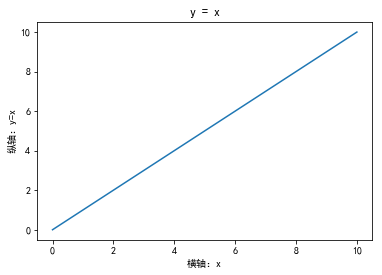

In [24]:
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei'] 
x=[0,10]
y=[0,10]
plt.plot(x,y)
plt.xlabel('横轴：x')
plt.ylabel('纵轴：y=x')
plt.title('y = x')
plt.show()

上图绘制了y = x 的图像，y 是 x 的线性函数。

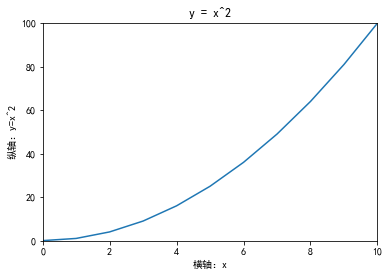

In [22]:
a=np.arange(0,100,1)
plt.plot(a,a*a)#红色虚线
plt.xlabel('横轴：x')
plt.ylabel('纵轴：y=x^2')
plt.axis([0,10,0,100])
plt.title('y = x^2')
plt.show()

上图绘制了y = x^2 的图像，y是x的二次函数

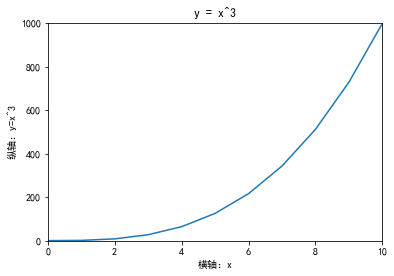

In [23]:
a=np.arange(0,100,1)
plt.plot(a,a*a*a)#红色虚线
plt.xlabel('横轴：x')
plt.ylabel('纵轴：y=x^3')
plt.axis([0,10,0,1000])
plt.title('y = x^3')
plt.show()

上图绘制了y = x^2 的图像，y是x的三次幂函数。

分别绘制了y关于x的幂函数（一次幂、二次幂、三次幂）。幂函数的一般形式是y = x ^α，其中，α可为任何常数。当α>0时，图像都经过点（1,1）（0,0），函数的图像在区间[0,+∞)上是增函数。